Model Ranking Table:
        Model  Rouge_Scores  Length_of_Summary  Training_Time  Rank
4        BART          0.80                145              8   1.0
0  BERTSumExt          0.75                130              9   2.0
2          T5          0.78                140             10   3.0
3       XLNet          0.76                135             11   4.0
1       GPT-3          0.82                150             12   5.0
5     Pegasus          0.79                138             13   6.0


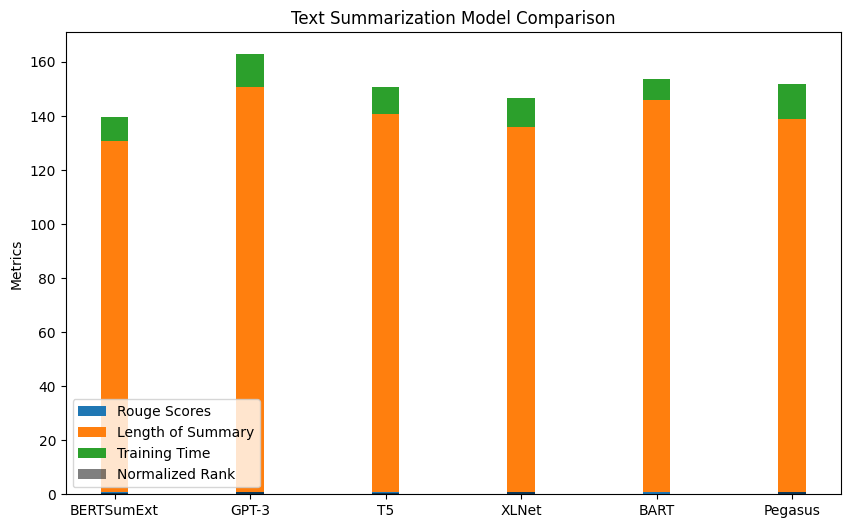

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import result
data=pd.read_csv('result.csv')


# Display the table
print("Model Ranking Table:")
print(data[['Model', 'Rouge_Scores', 'Length_of_Summary', 'Training_Time', 'Rank']].sort_values(by='Rank'))

# Bar chart
labels = data['Model']
num_models = len(labels)

# Parameters for bar chart
rouge_scores = data['Rouge_Scores']
length_of_summary = data['Length_of_Summary']
training_time = data['Training_Time']
ranks = data['Rank']

# Normalize ranks to a scale of 0 to 1 for better comparison
normalized_ranks = ranks / np.max(ranks)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(num_models)

ax.bar(index, rouge_scores, width=bar_width, label='Rouge Scores')
ax.bar(index, length_of_summary, width=bar_width, label='Length of Summary', bottom=rouge_scores)
ax.bar(index, training_time, width=bar_width, label='Training Time', bottom=rouge_scores + length_of_summary)
ax.bar(index, normalized_ranks, width=bar_width, label='Normalized Rank', color='black', alpha=0.5)

ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.set_ylabel('Metrics')
ax.set_title('Text Summarization Model Comparison')

ax.legend()
plt.savefig('barchart.png')
plt.show()
